## **Principal Component Analysis**

In [118]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### 1. Exploratory Data Analysis (EDA)

#### **1.Loading Dataset and basic data exploration**

In [119]:
# Importing Dataset
data = pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [120]:
# data size
data.shape

(178, 14)

In [121]:
# checking for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There are no null values in the data.

##### **2. Examining the distribution of features using histograms, box plots, or density plots.**

In [122]:
# Data Statistics
data_description = data.drop(columns=['Type']).describe()
data_description

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


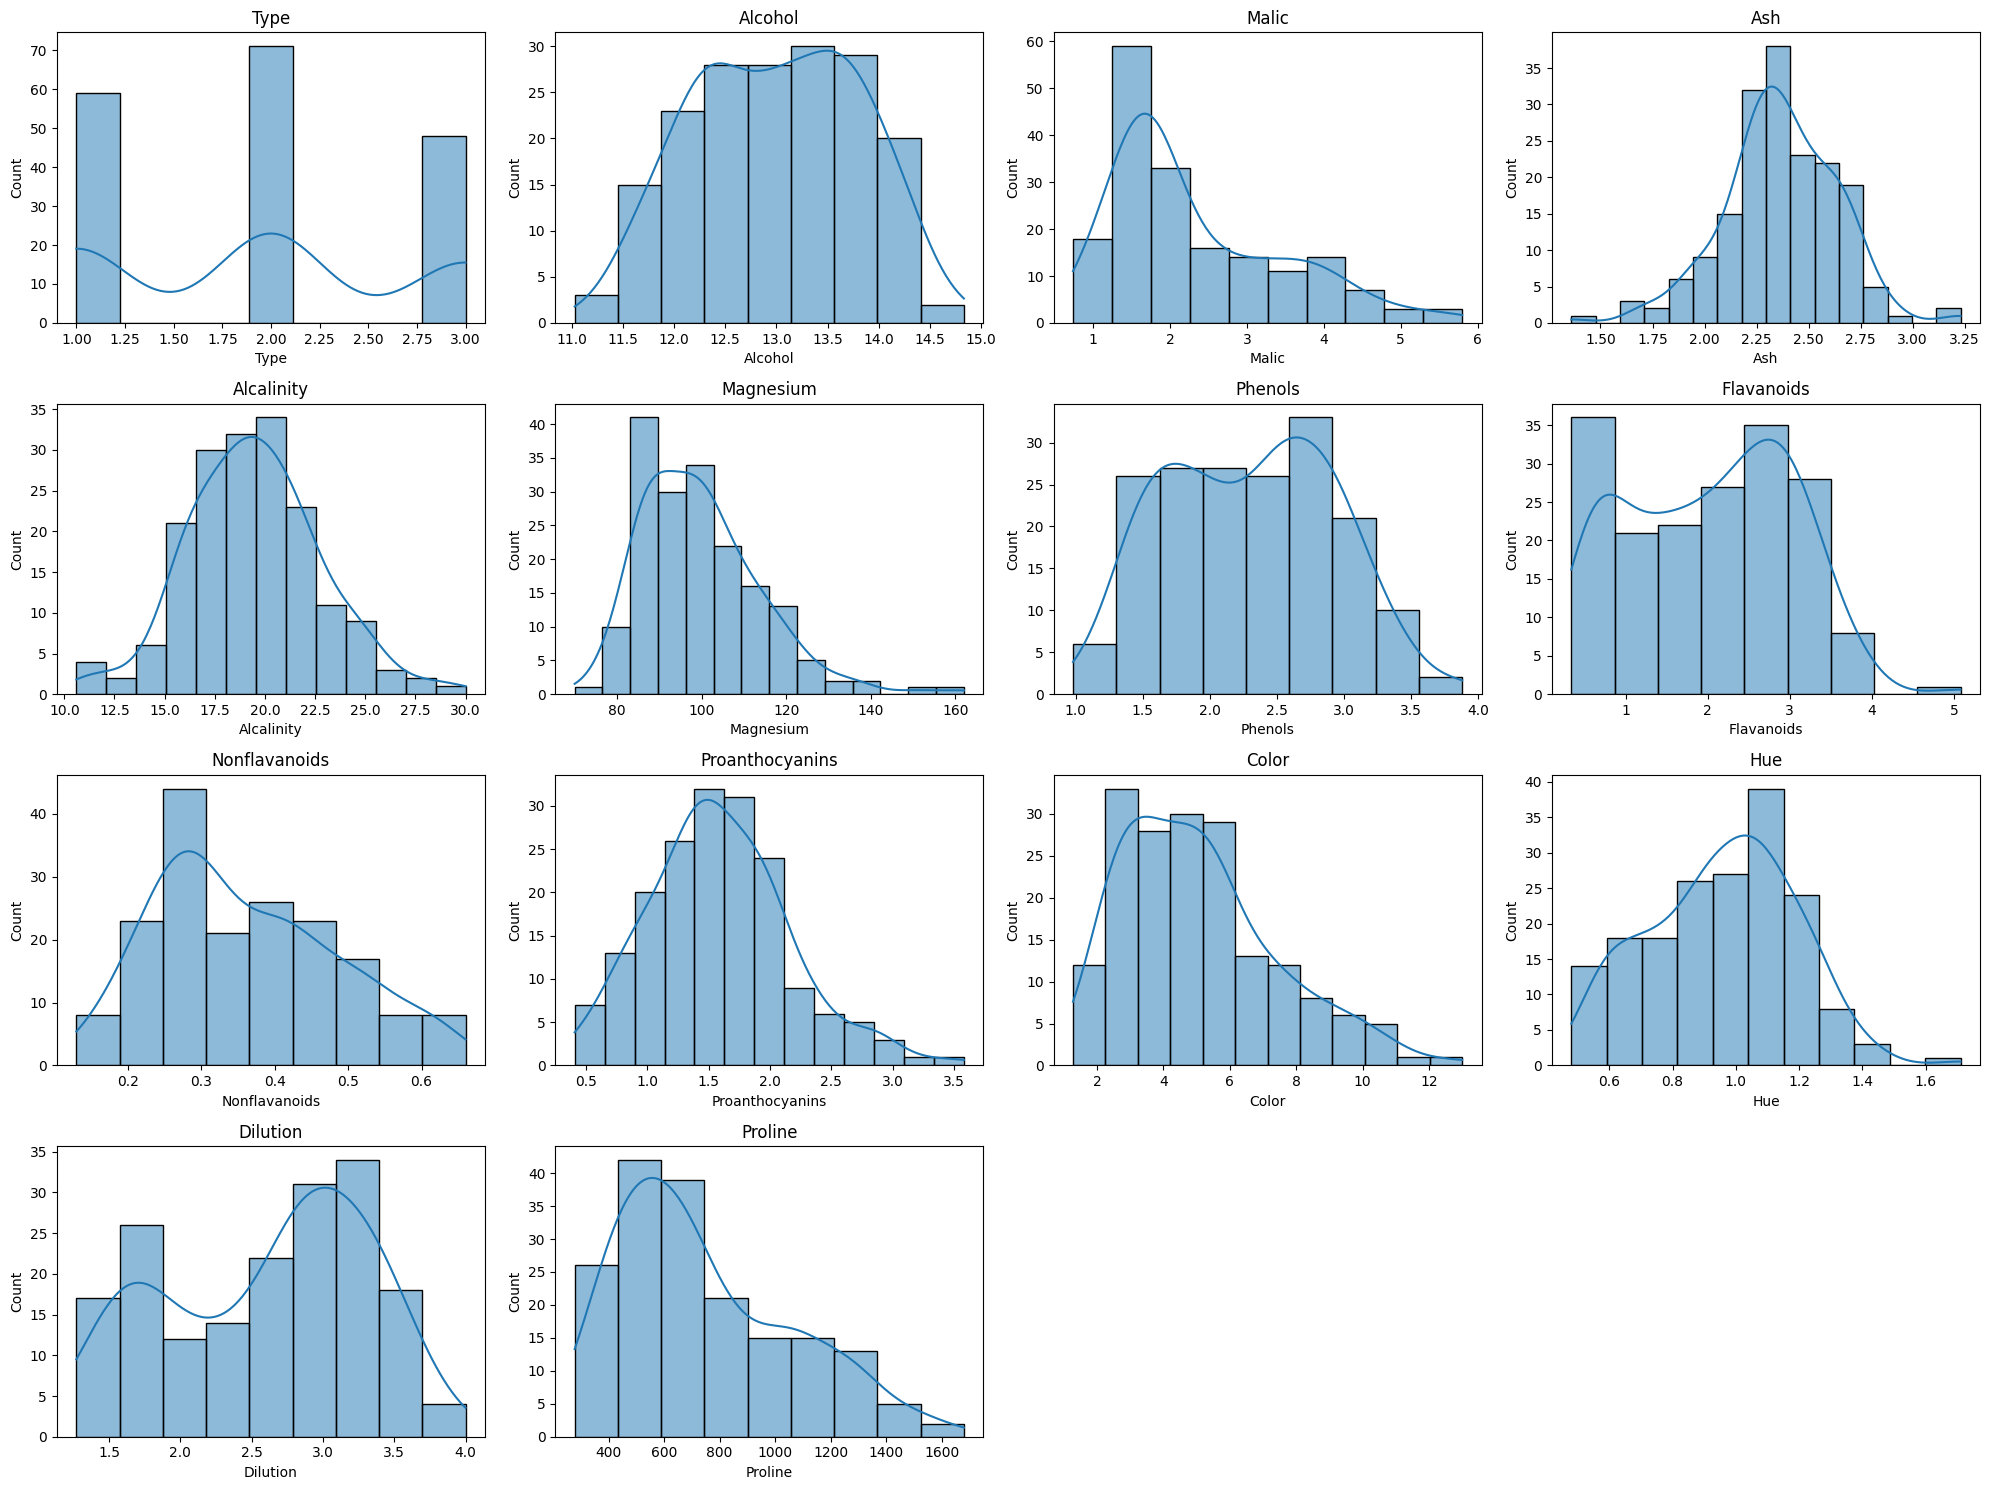

In [123]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot histograms for each feature
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

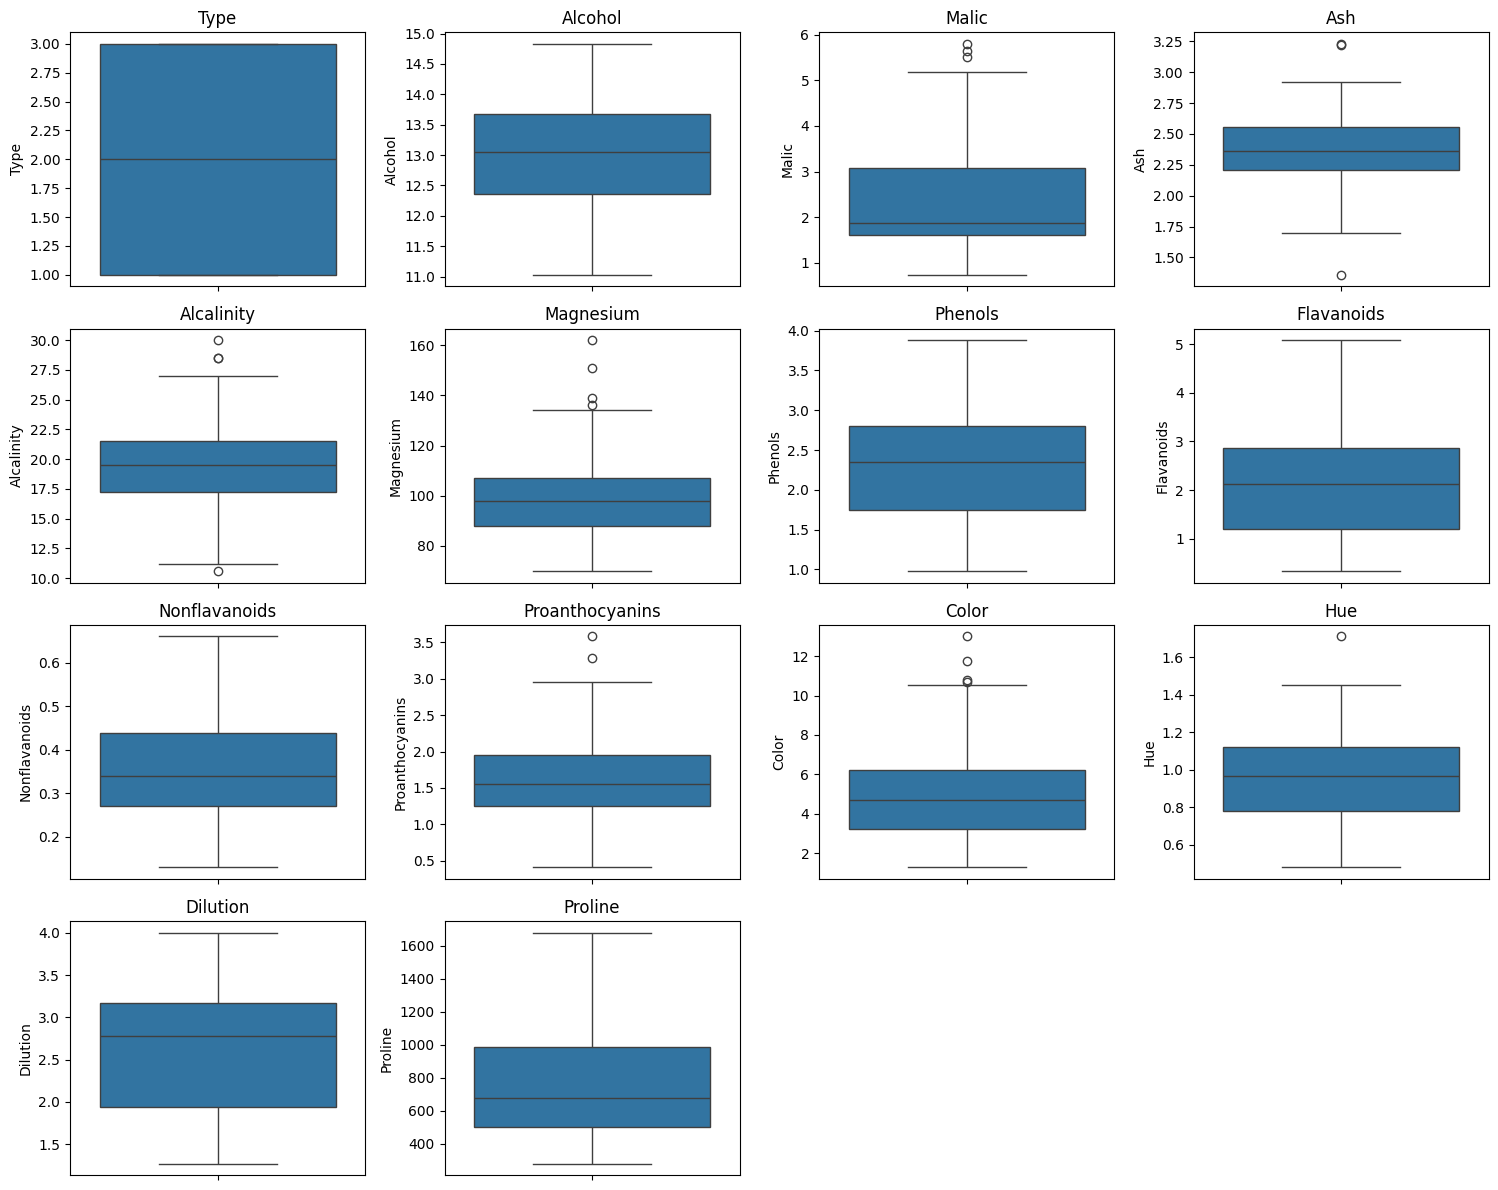

In [124]:
# Set up the matplotlib figure for box plots
plt.figure(figsize=(15, 12))

# Plot box plots for each feature
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

**Insights on histograms and boxplots**

*   The histograms show that some features, such as 'Color', 'Magnesium' 'Malic' and 'Proline', have a right-skewed distribution, indicating that most wines have lower values for these features with a few having very high values.
*   Features like 'Alcohol', 'Flavanoids' and 'Phenols' display a more uniform distribution, suggesting that these features have a wide range of values without a specific concentration around a central value.
*   Features such as 'Alcalinity', 'Hue', 'Proanthocyanins' and 'Ash' appear to have a normal distribution, indicating that most wines have average values for these features, with fewer wines having very high or very low values.
*   The box plots reveal the presence of several outliers in features like 'Color', 'Malic', and 'Magnesium'. These outliers represent wines with significantly different characteristics compared to the majority.





#### **3. Correlations between features to understand relationships within the data.**

In [125]:
# Compute the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


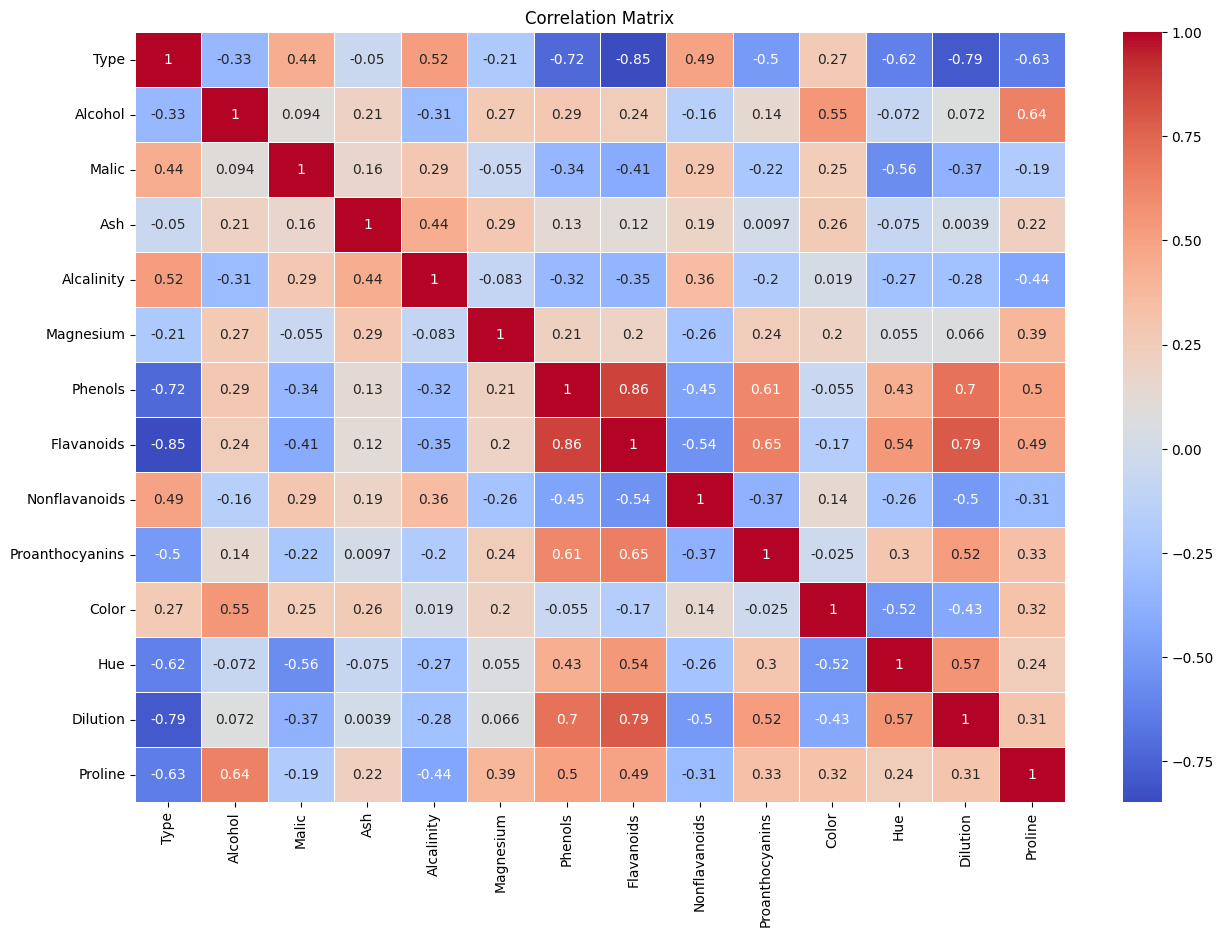

In [126]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Insights on Correlation matrix**

*   The correlation matrix shows that 'Flavanoids' and 'Phenols' have a very high positive correlation, indicating that wines with higher flavonoid content also tend to have higher total phenol content.
*   'Flavanoids' and 'Dilution' also exhibit a strong positive correlation.
*   There is a strong negative correlation between 'Flavanoids' and 'Type' (-0.85). This indicates that as the 'Flavanoids' content increases, the 'Type' value (likely representing different wine classes) tends to decrease.
*   There is also a strong negative correlation between 'Type' and 'Dilution' (-0.79).





### 2. Dimensionality Reduction with PCA

#### **1. Standardizing the features to ensure they have a mean of 0 and a standard deviation of 1.**

In [45]:
# Let's drop the Categorical column
final_data = data.drop(columns=['Type'])

In [46]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### **2. Implement PCA to reduce the dimensionality of the dataset.**

In [49]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(scaled_data)
pca_values = pca.fit_transform(scaled_data)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [50]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

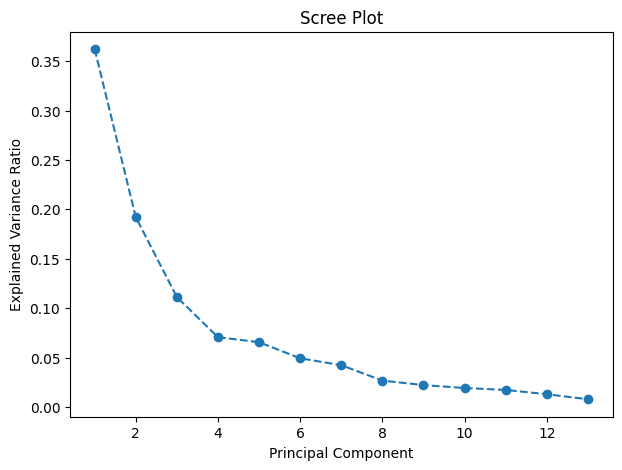

In [51]:
# Plot the scree plot
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [52]:
cumulative_variance = var.cumsum()
cumulative_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

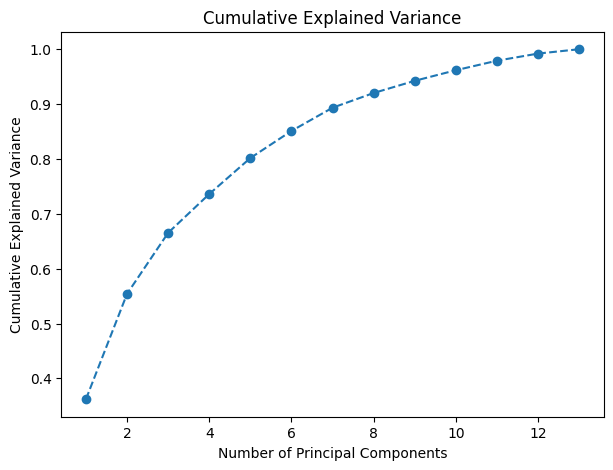

In [53]:
# Plot the cumulative explained variance
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [54]:
# Determine the number of components that explain 95% of the variance
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components that explain at least {threshold*100}% of the variance: {num_components}")

Number of components that explain at least 95.0% of the variance: 10


#### **3. Transform the original dataset into the principal components.**

In [128]:
# Apply PCA with the chosen number of components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])

# Considering 1st 3 components
principal_df_3 = pd.concat([pd.DataFrame(principal_df, columns=['PC1','PC2','PC3']), data['Type']], axis = 1)

# Display the first few rows of the principal components DataFrame
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366


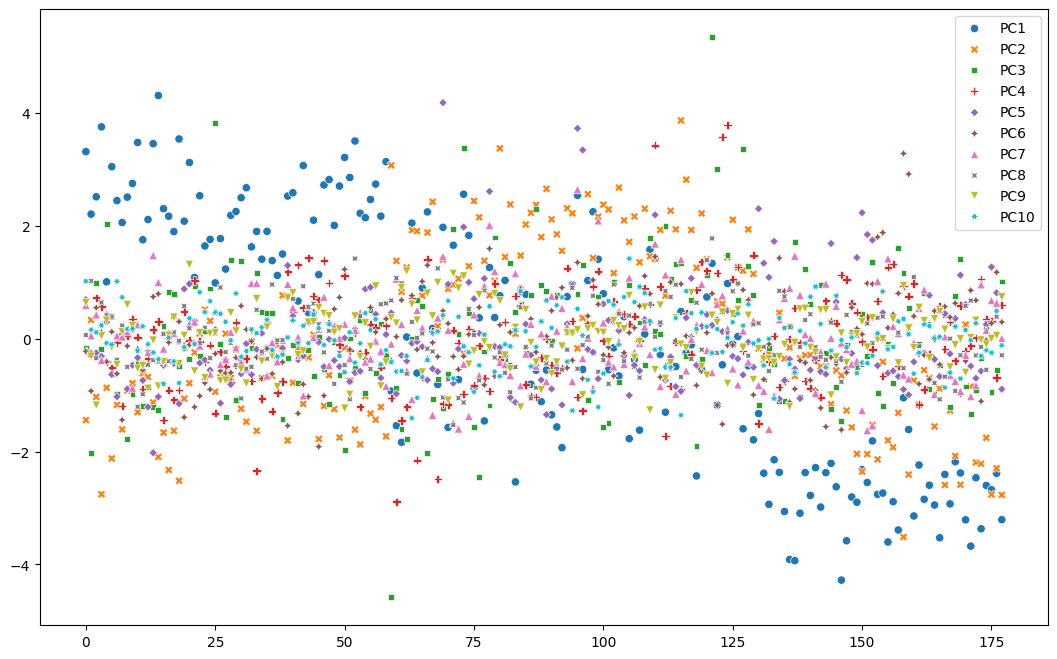

In [129]:
# Visualization of PCAs
fig=plt.figure(figsize=(13,8))
sns.scatterplot(data = principal_df)
plt.show()

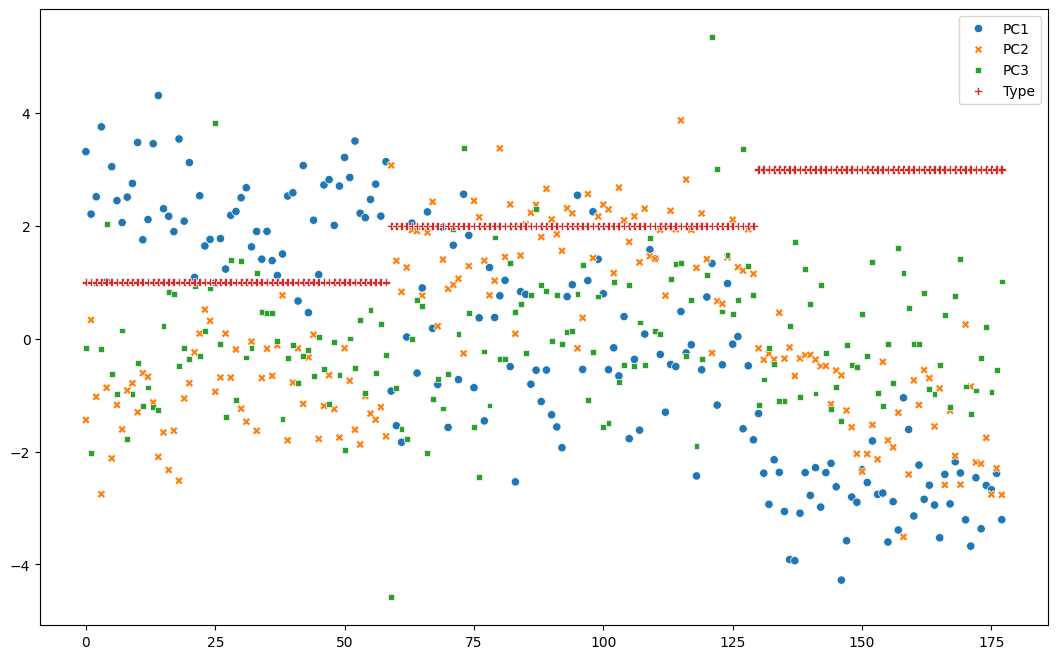

In [131]:
# Visualization of PCAs
fig=plt.figure(figsize=(13,8))
sns.scatterplot(data = principal_df_3)
plt.show()

#### **Heirarchial Clustering**

### Clustering with Original Data (Hierarchical clustering)

##### **1. Apply a clustering algorithm to the original dataset.**

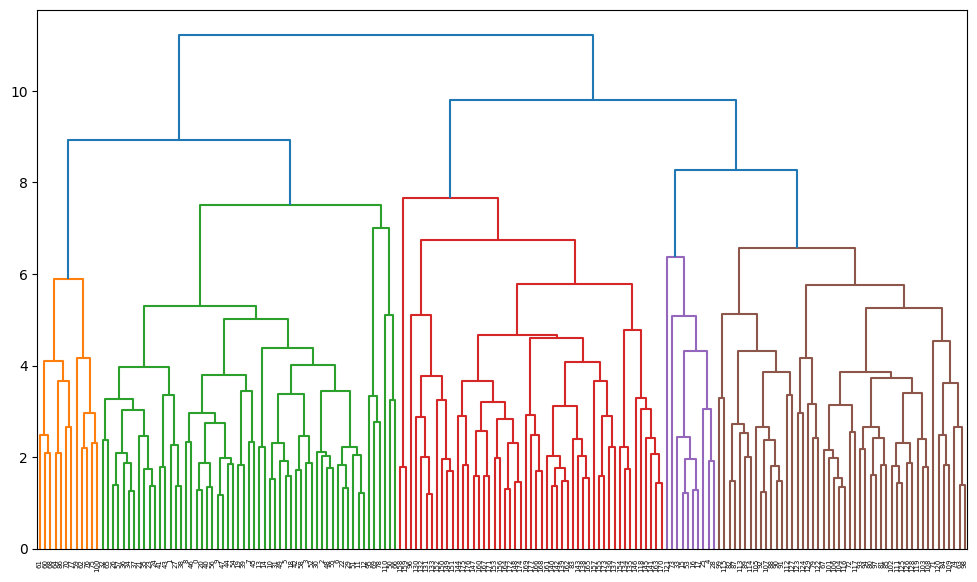

In [132]:
# creating dendrogram
plt.figure(figsize = (12, 7));
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='complete'))

In [133]:
# Apply Hierarchical clustering to the original dataset
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels_hc = hc.fit_predict(scaled_data)
labels_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

##### **2. Visualize the clustering results using appropriate plots.**

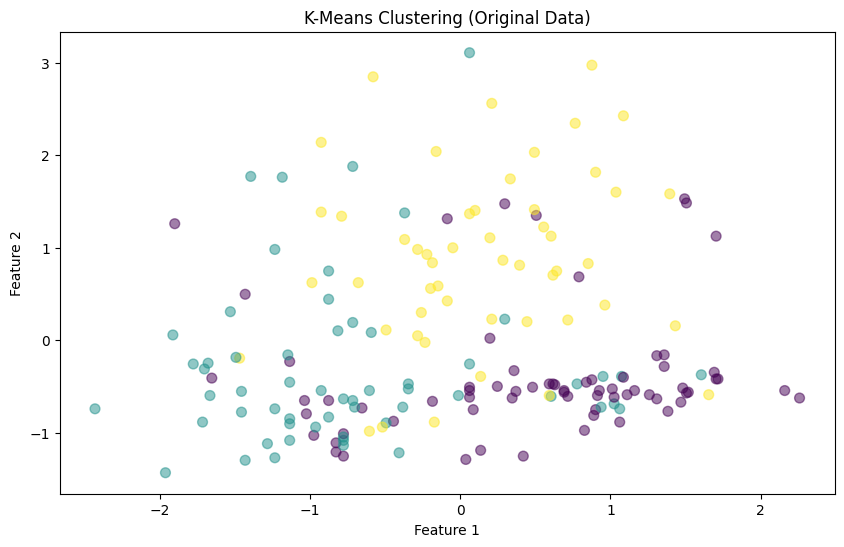

In [134]:
# Visualize the clustering results using a scatter plot for the first two features
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_hc, s=50, alpha=0.5)
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##### **3. Evaluate the clustering performance on the original data.**

In [135]:
silhouette_hierarchical_original = silhouette_score(scaled_data, labels_hc)
davies_bouldin_hierarchical_original = davies_bouldin_score(scaled_data, labels_hc)
print(f"Silhouette Score (Original Data): {silhouette_hierarchical_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_hierarchical_original}")

Silhouette Score (Original Data): 0.20378689690677748
Davies-Bouldin Index (Original Data): 1.8960960515907337


### Clustering with PCA Data (Hierarchical clustering)

**1. Apply Hierarchical clustering to the PCA-transformed dataset**

In [136]:
# Apply Hierarchical clustering to the PCA-transformed dataset
hc_pca = AgglomerativeClustering(n_clusters=3)
labels_hc_pca = hc_pca.fit_predict(principal_components)
labels_hc_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

**2.Visualize Hierarchical clustering results for the PCA-transformed data**

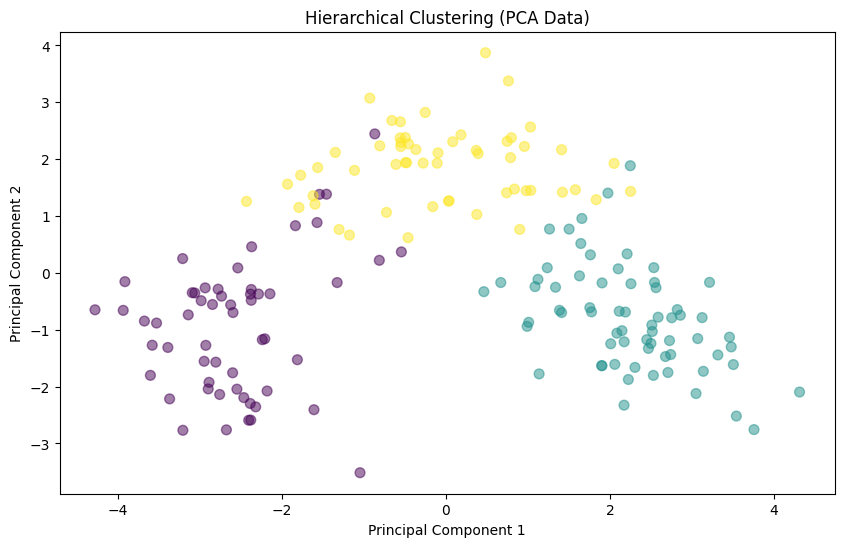

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels_hc_pca, cmap='viridis', s=50, alpha=0.5)
plt.title('Hierarchical Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**3. Evaluate Hierarchical clustering performance on the PCA data**

In [138]:
silhouette_hierarchical_pca = silhouette_score(principal_components, labels_hc_pca)
davies_bouldin_hierarchical_pca = davies_bouldin_score(principal_components, labels_hc_pca)
print(f"Silhouette Score (PCA Data): {silhouette_hierarchical_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_hierarchical_pca}")

Silhouette Score (PCA Data): 0.2839520778138408
Davies-Bouldin Index (PCA Data): 1.3440708190922397


#### **K-Means clustering**

### Clustering with Original Data (K-Means clustering)

**1. Apply K-Means clustering to the original dataset**

In [139]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_kmeans_original = kmeans_original.fit_predict(scaled_data)
labels_kmeans_original

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

**2.	Visualize the clustering results using appropriate plots.**

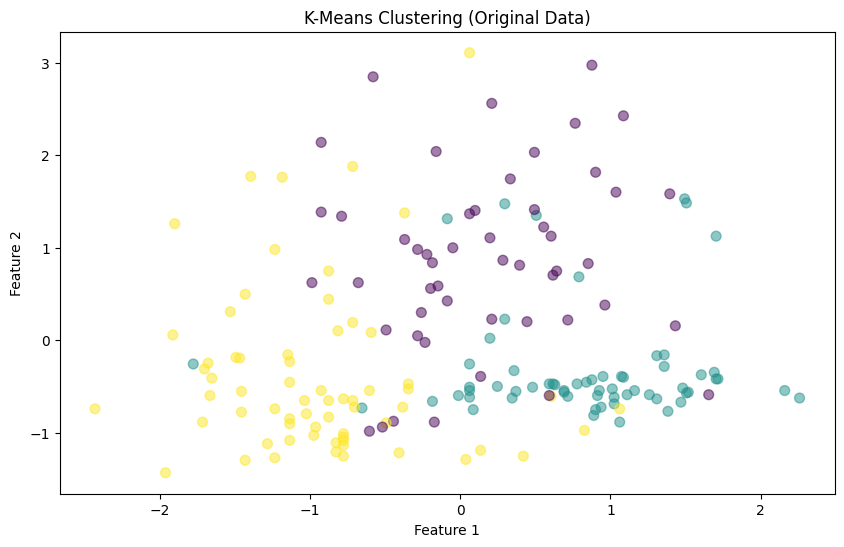

In [140]:
# Visualize K-Means clustering results for the original data
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_kmeans_original, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**3. Evaluate the clustering performance on the original data**

In [141]:
# Evaluate K-Means clustering performance on the original data
silhouette_kmeans_original = silhouette_score(scaled_data, labels_kmeans_original)
davies_bouldin_kmeans_original = davies_bouldin_score(scaled_data, labels_kmeans_original)
print(f"Silhouette Score (Original Data): {silhouette_kmeans_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_kmeans_original}")

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.3891879777181648


### Clustering with PCA Data (K-Means clustering)

**1. Apply K-Means clustering to the PCA-transformed dataset**

In [142]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(principal_components)
labels_kmeans_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

**2. Visualize K-Means clustering results for the PCA-transformed data**

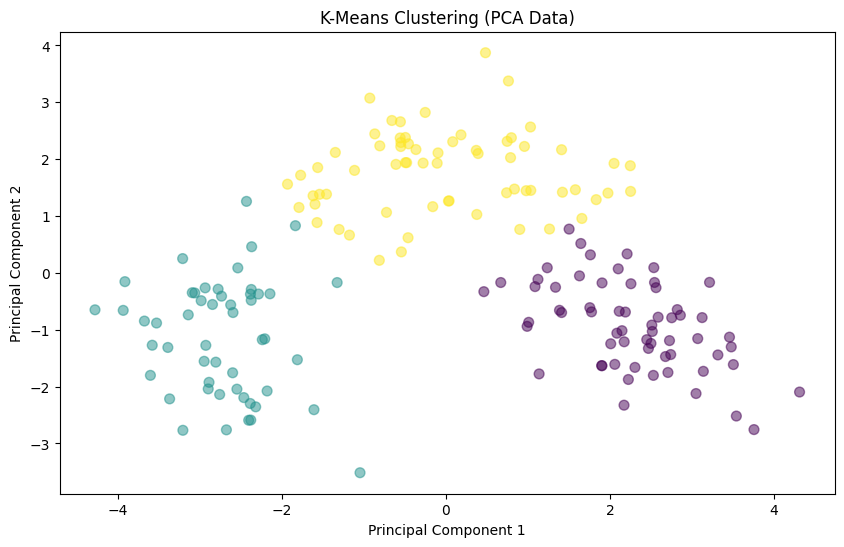

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels_kmeans_pca, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**3. Evaluate K-Means clustering performance on the PCA data**

In [144]:
silhouette_kmeans_pca = silhouette_score(principal_components, labels_kmeans_pca)
davies_bouldin_kmeans_pca = davies_bouldin_score(principal_components, labels_kmeans_pca)
print(f"Silhouette Score (PCA Data): {silhouette_kmeans_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_kmeans_pca}")

Silhouette Score (PCA Data): 0.29867482943692897
Davies-Bouldin Index (PCA Data): 1.336326333515576


### Comparison and Analysis
**1. Comparision of clustering results obtained from the original dataset and PCA-transformed data**

**Hierarchical Clustering:**<br>
**Original Data:** Silhouette Score: 0.2038, Davies-Bouldin Index: 1.8961<br>
**PCA Data:** Silhouette Score: 0.2840, Davies-Bouldin Index: 1.3441

**K-Means Clustering:**<br>
Original Data: Silhouette Score: 0.2849, Davies-Bouldin Index: 1.3892<br>
PCA Data: Silhouette Score: 0.2987, Davies-Bouldin Index: 1.3363

**Similarities or differences observed in the clustering results**

*   Both clustering methods (Hierarchical and K-Means) show improved performance on PCA-transformed data compared to the original data. This is indicated by higher Silhouette Scores and lower Davies-Bouldin Indices for the PCA data.
*   The improvement in clustering quality is more pronounced in Hierarchical Clustering, with a significant increase in the Silhouette Score from 0.2038 to 0.2840 and a decrease in the Davies-Bouldin Index from 1.8961 to 1.3441.
*   K-Means clustering shows a moderate improvement with PCA, with the Silhouette Score increasing from 0.2849 to 0.2987 and the Davies-Bouldin Index decreasing from 1.3892 to 1.3363.



**Reflection on the impact of dimensionality reduction on clustering performance:**


*   Dimensionality reduction with PCA has positively impacted the clustering performance for both Hierarchical and K-Means clustering algorithms.
*   PCA has likely reduced noise and redundant information, allowing the clustering algorithms to better identify the underlying structure of the data.
*   By focusing on the principal components that capture the most variance, PCA facilitates clearer and more distinct cluster formation.



**Trade-offs between using PCA and clustering directly on the original dataset**

*   With PCA we can see improved clustering performance, as observed by higher Silhouette Scores and lower Davies-Bouldin Indices.
*   With PCA we can see reduced computational complexity due to fewer dimensions.
*   Enhanced ability to visualize data in fewer dimensions, making it easier to interpret the clustering results with PCA.
*   With PCA, loss of some information that might be relevant for certain features not seen in the principal components.
*   Direct clustering on original Dat Retains all original information, potentially showing all hidden patterns that PCA might miss.
*   Direct clustering involves simpler workflow without the need for additional dimensionality reduction steps.


### Conclusion and Insights

**Summary of the key findings and insights from the assignment.**
*   PCA effectively improves clustering performance for both Hierarchical and K-Means algorithms.
*   PCA-transformed data resulted in higher Silhouette Scores and lower Davies-Bouldin Indices, indicating better-defined clusters.
*   Features like 'Color', 'Malic', and 'Magnesium' contain outliers, and the distribution of features varies from skewed to normal.


**Practical implications of using PCA and clustering in data analysis.**


*   PCA helps in simplifying complex datasets by reducing dimensionality, which can lead to better clustering results and easier data visualization.
*   Clustering on PCA-transformed data can uncover hidden patterns and structures more effectively than clustering on the original high-dimensional data.


**Recommendations for when to use each technique based on the analysis conducted**
*   Use PCA when dealing with high-dimensional data to enhance clustering performance and reduce computational load. It is especially useful when the data contains noise or redundant information.
*   Clustering is used on original data when the dataset is not overly high-dimensional or when the preservation of all feature information is critical. This approach is simpler and avoids potential information loss due to dimensionality reduction.

**Visualization Insights**

*   The histograms and box plots reveal various distributions and outliers across features, providing insights of data's characteristics.
*   Histograms show that features like 'Color', 'Magnesium', 'Malic', and 'Proline' are right-skewed, while 'Alcohol', 'Flavanoids', and 'Phenols' have a more uniform distribution. 'Alcalinity', 'Hue', 'Proanthocyanins', and 'Ash' appear normally distributed.
*   Box Plots highlight the presence of outliers in features such as 'Color', 'Malic', and 'Magnesium', indicating that some wines have significantly different properties compared to the majority.


Overall, by combining PCA with clustering techniques, we can achieve more robust and interpretable clustering results, which is essential for uncovering meaningful insights in complex datasets.
